<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/18_CNN_FASHION_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
samples=np.random.randint(60000,size=25)

In [4]:
samples

array([42572, 23863,  2962, 11748, 56438, 37909,  8873, 51850, 44399,
       56497, 17758, 17562,  2964, 45957,  7302, 56093,  8786, 30576,
       33395, 20458, 19791, 44955, 10202, 31743, 30744])

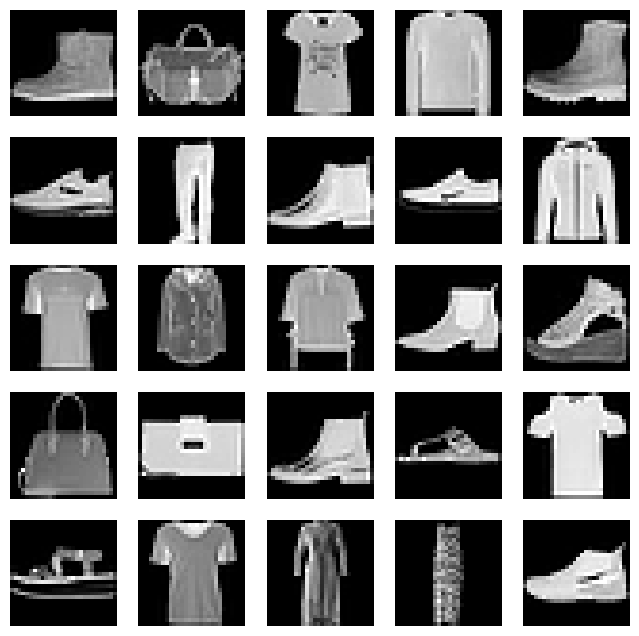

In [5]:
fig=plt.figure(figsize=(8,8))
for i,idx in enumerate(samples):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx],cmap='gray')
  plt.axis('off')
  plt.xlabel(y_train[idx])
plt.show()

In [6]:
np.set_printoptions(threshold=np.inf)

In [7]:
pd.Series(y_train).value_counts()

,count
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000
8,6000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

#스케일링

In [10]:
x_train_s=x_train.astype('float32')/255.
x_val_s=x_val.astype('float32')/255.

#원핫인코딩

In [11]:
from keras.utils import to_categorical
y_train_o=to_categorical(y_train)
y_val_o=to_categorical(y_val)

#모델 만들기

In [12]:
x_train_s.shape

(48000, 28, 28)

In [ ]:
x_train_s.reshape(-1,28,28,1)#마지막이 흑백이라 1로 추가됨, 컬러면 3

In [ ]:
x_train_s,shape

In [ ]:
from keras import layers

model=keras.Sequential([
    layers.Input(shape=(28,28)),
    layers.Conv2d(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MavPool2d(pool_size=(2,2)),
    layers.Conv2d(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MavPool2d(pool_size=(2,2)), #2차원임
    layers.Flatten(),
    layers.Dense(16,activation='relu'),
    layers.Dense(10,activation='softmax'),


])

model.summary()

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [ ]:
batch_size=64
epochs=100

history=model.fit(x_train_s,
          y_train_o,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val_s,y_val_o)
          )

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


In [ ]:
plot_history(history)

#테스트

In [ ]:
x_test_s=x_test.astype('float32')/255.
y_test_o=to_categorical(y_test)

In [ ]:
y_pred=model.predict(x_test_s)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


In [ ]:
y_pred

In [ ]:
np.argmax(y_pred,axis=1)

In [ ]:
print_metrics(np.argmax(y_test_o,axis=1),np.argmax(y_pred,axis=1)) #최댓값만 출력